In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [17]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


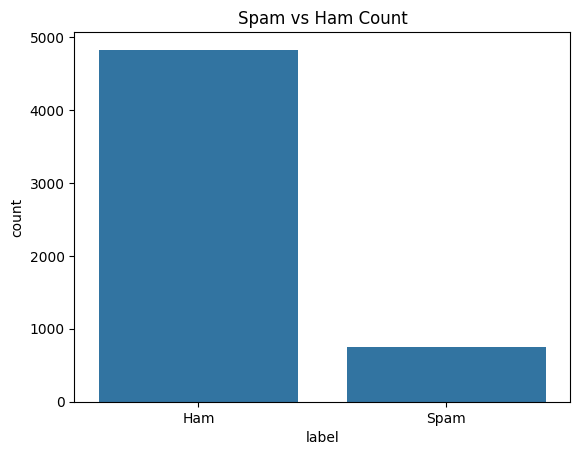

In [18]:
df['msg_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()


In [19]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [15]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [22]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)


In [23]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_preds = lr.predict(X_test_tfidf)


In [24]:
svm = SVC()
svm.fit(X_train_tfidf, y_train)
svm_preds = svm.predict(X_test_tfidf)


In [25]:
def evaluate_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")


In [26]:
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("SVM", y_test, svm_preds)


---- Naive Bayes ----
Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



---- Logistic Regression ----
Accuracy: 0.9524663677130045
Confusion Matrix:
 [[962   3]
 [ 50 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



---- SVM ----
Accuracy: 0.9766816143497757
Confusion Matrix:
 [[964   1]
 [ 25 125]]
Classification 